# Predicting the Price of Used Cars

This project focuses on predicting used car prices using a range of features, including `Brand`, `Model`, `Mileage`, `Fuel_Type`, and `Year`.

**Accurately predicting the market value of used cars benefits both buyers and sellers.**

Many people find themselves engaged with the used car market at some point, whether they're looking to sell their own vehicle or purchase one. Ensuring that transactions reflect the true market value of the vehicle is essential to avoid overpaying or underselling.


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Loading the raw data

In [2]:
car_data = pd.read_csv("C:/Users/ravih/Downloads/car_price_data1.csv")

In [3]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Drop features that are not required to build our model

In [6]:
# In Model column There are three hundred and twelve unique models. 
# That's something really hard to implement and a regression that would mean more than 300 dummies,
df = car_data.drop(labels='Model', axis=1)

In [7]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Check for any missing value in data set and treat it

In [8]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Exploratory Data Analysis (EDA)

In [11]:
# For numerical features
print(df.describe())

               Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
std     25815.734988   103.394703     4.935941     6.695595
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    90.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000


In [12]:
# For categorical features
print(df.describe(include=['O']))

             Brand   Body Engine Type Registration
count         4025   4025        4025         4025
unique           7      6           4            2
top     Volkswagen  sedan      Diesel          yes
freq           880   1534        1861         3654


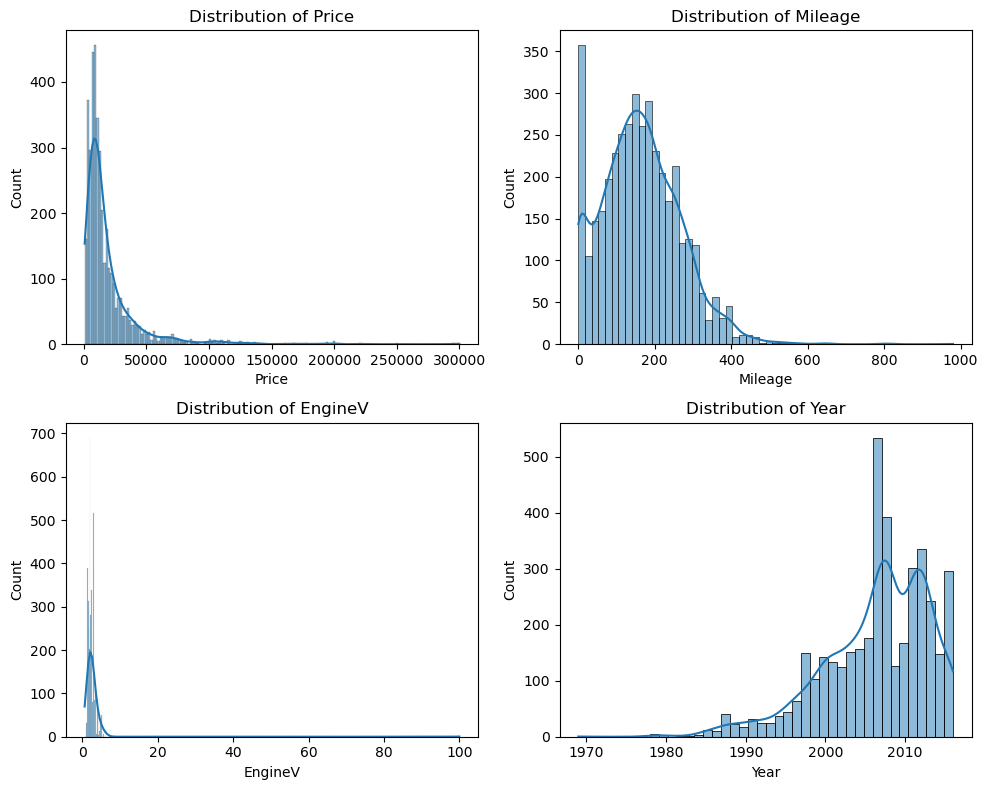

In [13]:
# Define numerical features
numerical_features = ['Price', 'Mileage', 'EngineV', 'Year']

# Set up the matplotlib figure, 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')


# Tightly layout the plots
plt.tight_layout()
plt.show()

In [14]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider

df=df[df['EngineV']<6.5]
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


<AxesSubplot:xlabel='EngineV', ylabel='Count'>

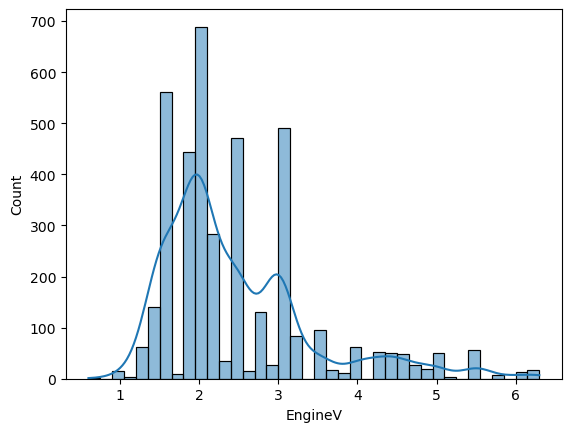

In [15]:
sns.histplot(df['EngineV'], kde=True)

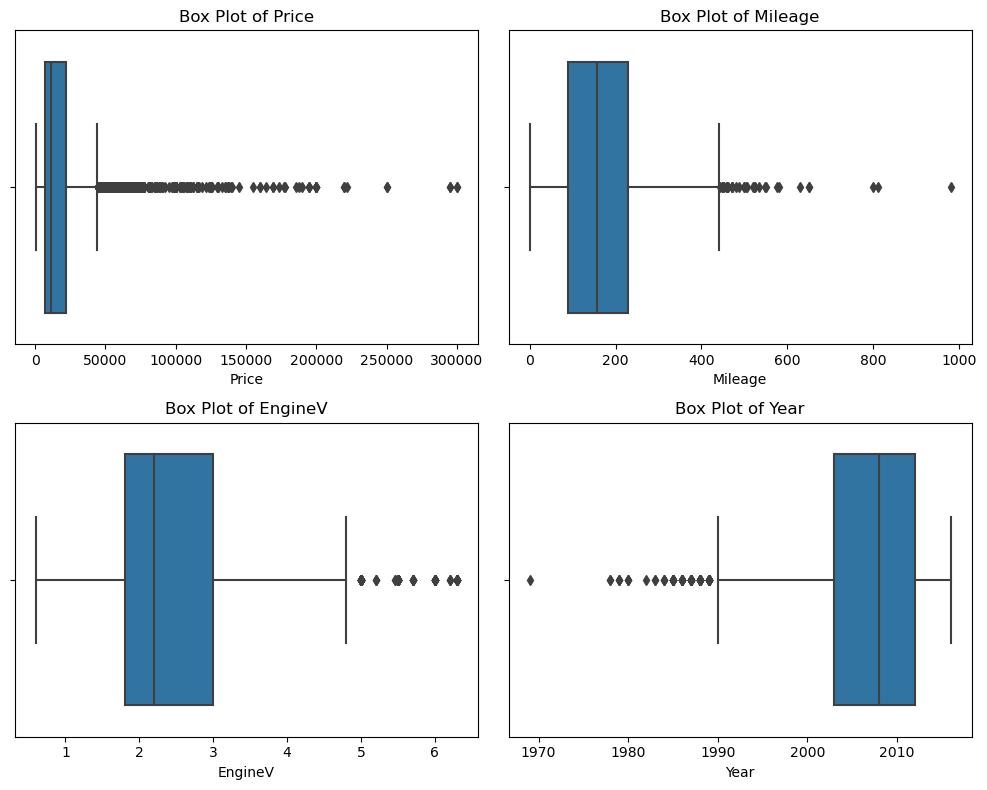

In [16]:


# Set up the matplotlib figure, 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')


# Tightly layout the plots
plt.tight_layout()
plt.show()

## Let's transform 'Price' with a log transformation


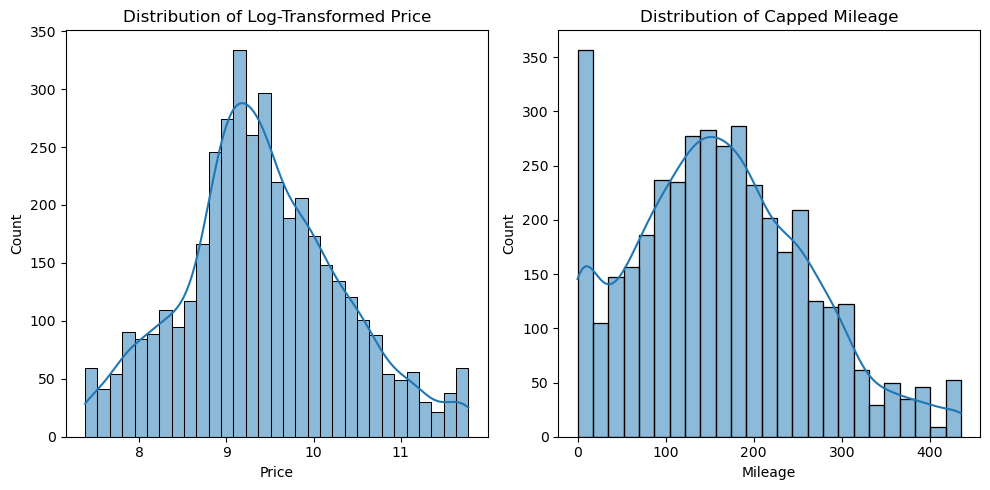

In [17]:
import numpy as np



# Capping the outliers for 'Price' and 'Mileage'
for feature in ['Price',  'Mileage']:
    q1 = df[feature].quantile(0.01)
    q99 = df[feature].quantile(0.99)
    df[feature] = np.clip(df[feature], q1, q99)

# Applying a log transformation to 'Price'
df['Price'] = np.log(df['Price'])

# Create a figure and a 1x3 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

# Log-Transformed Price
sns.histplot(df['Price'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Log-Transformed Price')


# Capped Mileage
sns.histplot(df['Mileage'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Capped Mileage')

plt.tight_layout()
plt.show()


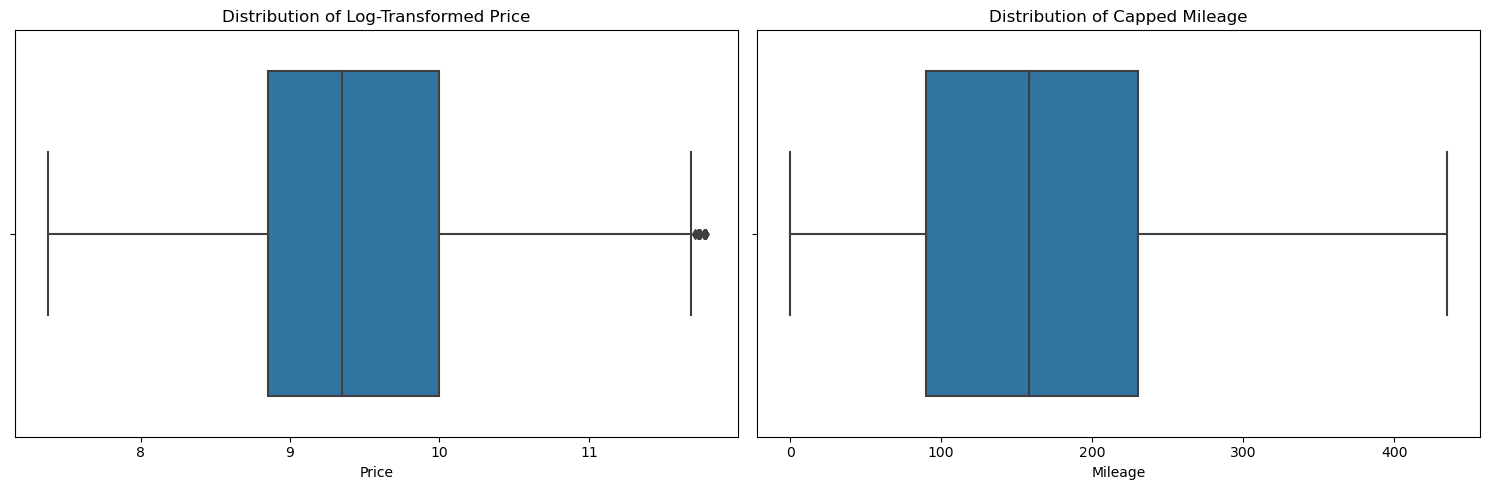

In [18]:
# Create a figure and a 1x3 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 

# Log-Transformed Price
sns.boxplot(df['Price'], ax=ax[0])
ax[0].set_title('Distribution of Log-Transformed Price')


# Capped Mileage
sns.boxplot(df['Mileage'], ax=ax[1])
ax[1].set_title('Distribution of Capped Mileage')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Log price and EngineV')

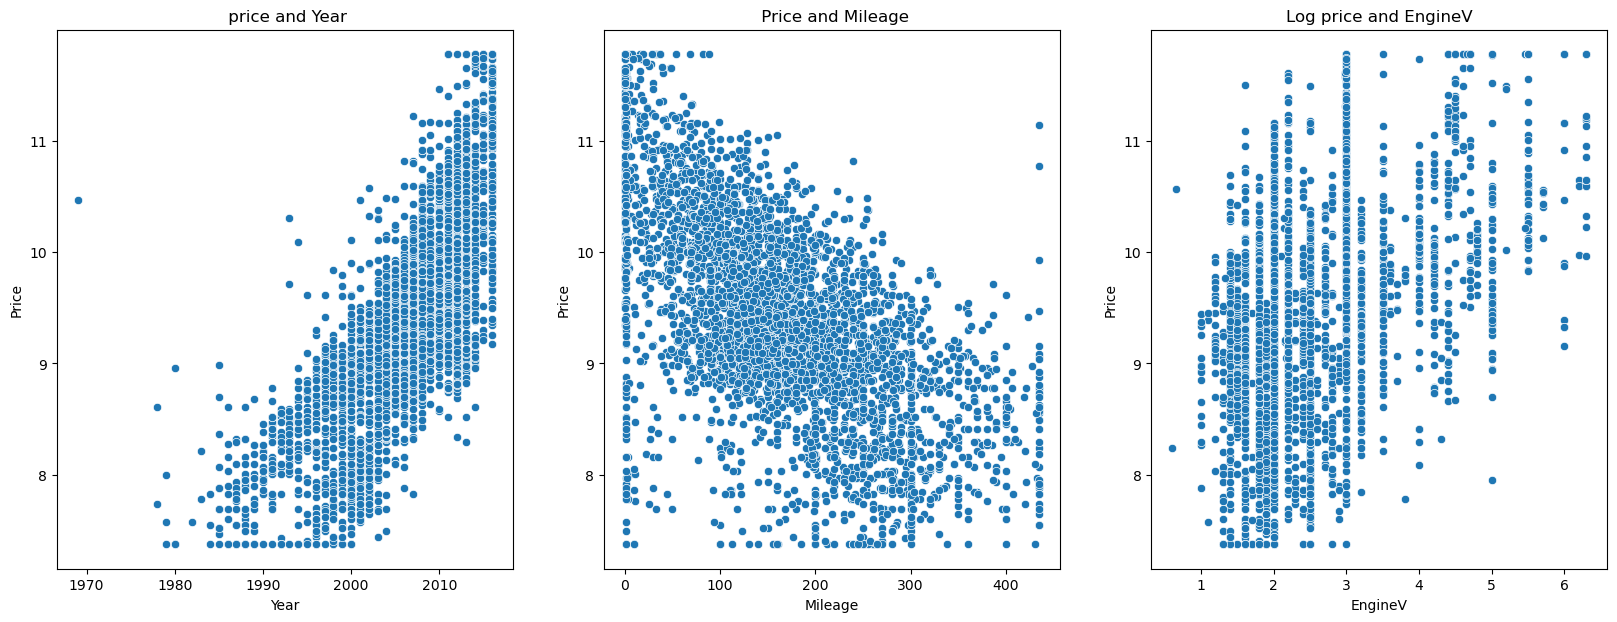

In [19]:
# Let's check the three scatters 

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title(" price and Year")
sns.scatterplot(x='Year',y='Price',data=df)

plt.subplot(1,3,2)
plt.title(" Price and Mileage")
sns.scatterplot(y='Price',x='Mileage',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=df)
plt.title("Log price and EngineV")



In [20]:
# The relationships show a clear linear relationship
# This is some good linear regression material

## Checking Multicollinearity

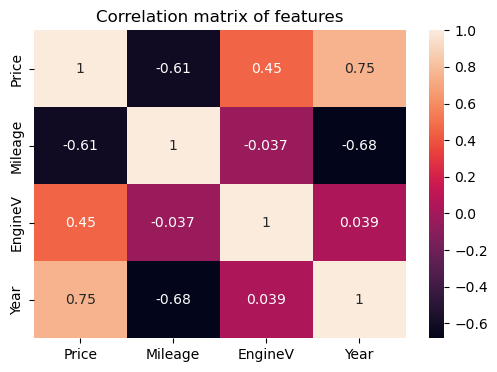

In [21]:
# Let's start by looking at the correlation matrix to understand the relationship between features
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix of features')
plt.show()

## Categorical Features

In [22]:
# One-Hot Encoding the categorical variables
# Assuming 'Brand', 'Body', 'Engine Type', 'Model' and 'Registration' are the categorical columns
categorical_columns = ['Brand', 'Body', 'Engine Type', 'Registration']

# Applying one-hot encoding to these categorical columns
df1 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Showing the shape of the dataframe after encoding to see how many new columns were added
df1.shape


(4002, 19)

In [23]:
df1

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427.0,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358.0,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240.0,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120.0,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9.792556,35.0,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,11.736069,9.0,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,8.779557,1.0,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8.987197,194.0,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Model Development

### Declaring dependent and independent variable

In [24]:
from sklearn.model_selection import train_test_split

# Assuming 'Log_Price' is your target variable and the rest are features
X = df1.drop('Price', axis=1)  # Features
y = df1['Price']               # Target

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X = scaler.fit_transform(X)
#X_test  = scaler.transform(X_test)


## Training and Testing Data

In [26]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3201, 18)
X_test shape: (801, 18)
y_train shape: (3201,)
y_test shape: (801,)


# Linear Regression Model

In [27]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train,y_train)

# Model Summary
y_pred_lr = lr.predict(X_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8834721086790092
RMSE : 0.30661501541034153


# Random Forest Regressor Model

In [28]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9193259850411573
RMSE : 0.2551204727370631


# GBT Regressor Model

In [29]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9188642600821159
RMSE : 0.255849501932698


In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.19277278414503016
MSE: 0.06545896763920964
RMSE: 0.255849501932698


# Selecting The Best Model

*So as we try diferent Regression Alorithms and found that **"GBT Regressor Model"** is giving better accuracy compare to other.*


## let's manually check these predictions

In [32]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])


df_ev.tail()

,Predicted Price,Actual Price,Residual,Difference%
796,11548.93,12000.00,451.07,3.76
797,18172.29,18400.00,227.71,1.24
798,28931.88,28500.00,-431.88,1.52
799,12386.44,14000.00,1613.56,11.53
800,8357.08,9500.00,1142.92,12.03
